**Exploración de datos EDA**



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
DIR = "/content/drive/MyDrive/"
os.chdir(DIR)

In [56]:
# Loading the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import scipy.stats as stats
from sklearn.datasets import make_classification

from sklearn.linear_model import LogisticRegression


In [70]:
df = pd.read_excel("ENB2012_data.xlsx")
df

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
...,...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5,17.88,21.40
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5,16.54,16.88
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5,16.44,17.11
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5,16.48,16.61


In [71]:
df.rename(columns={'X1' : 'compacidad_relativa'}, inplace=True)

In [72]:
df.rename(columns={'X2' : 'area_superficie'}, inplace=True)

In [73]:
df.rename(columns={'X3' : 'area_pared'}, inplace=True)

In [74]:
df.rename(columns={'X4' : 'area_techo'}, inplace=True)

In [75]:
df.rename(columns={'X5' : 'altura_total'}, inplace=True)

In [76]:
df.rename(columns={'X6': 'orientacion'}, inplace=True)

In [77]:
df.rename(columns={'X7': 'acristalamiento'}, inplace=True)

In [78]:
df.rename(columns={'X8': 'distribucion_acristalamiento'}, inplace=True)

In [79]:
df.rename(columns={'Y1': 'carga_calefaccion'}, inplace=True)

In [80]:
df.rename(columns={'Y2': 'carga_enfriamiento'}, inplace=True)

In [81]:
df

,compacidad_relativa,area_superficie,area_pared,area_techo,altura_total,orientacion,acristalamiento,distribucion_acristalamiento,carga_calefaccion,carga_enfriamiento
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
...,...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5,17.88,21.40
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5,16.54,16.88
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5,16.44,17.11
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5,16.48,16.61


# Análisis descriptivo

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   compacidad_relativa           768 non-null    float64
 1   area_superficie               768 non-null    float64
 2   area_pared                    768 non-null    float64
 3   area_techo                    768 non-null    float64
 4   altura_total                  768 non-null    float64
 5   orientacion                   768 non-null    int64  
 6   acristalamiento               768 non-null    float64
 7   distribucion_acristalamiento  768 non-null    int64  
 8   carga_calefaccion             768 non-null    float64
 9   carga_enfriamiento            768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


In [30]:
##Porcentaje valores faltantes por columna
df.isna().mean() * 100

,0
compacidad_relativa,0.0
area_superficie,0.0
area_pared,0.0
area_techo,0.0
altura_total,0.0
orientacion,0.0
acristalamiento,0.0
distribucion_acristalamiento,0.0
carga_calefaccion,0.0
carga_enfriamiento,0.0


In [31]:
# Primero identificamos cantidad de valores únicos por columna, ya que las que tienen un solo valor único o todos los valores diferentes no serán útiles en análisis y deberían eliminarse antes del EDA.
df.nunique()

,0
compacidad_relativa,12
area_superficie,12
area_pared,7
area_techo,4
altura_total,2
orientacion,4
acristalamiento,4
distribucion_acristalamiento,6
carga_calefaccion,587
carga_enfriamiento,636


In [ ]:
##Descriptivas de variables numéricas
df.describe().T

,count,mean,std,min,25%,50%,75%,max
X1,768.0,0.764167,0.105777,0.62,0.6825,0.75,0.8300,0.98
X2,768.0,671.708333,88.086116,514.50,606.3750,673.75,741.1250,808.50
X3,768.0,318.500000,43.626481,245.00,294.0000,318.50,343.0000,416.50
X4,768.0,176.604167,45.165950,110.25,140.8750,183.75,220.5000,220.50
X5,768.0,5.250000,1.751140,3.50,3.5000,5.25,7.0000,7.00
X6,768.0,3.500000,1.118763,2.00,2.7500,3.50,4.2500,5.00
X7,768.0,0.234375,0.133221,0.00,0.1000,0.25,0.4000,0.40
X8,768.0,2.812500,1.550960,0.00,1.7500,3.00,4.0000,5.00
Y1,768.0,22.307195,10.090204,6.01,12.9925,18.95,31.6675,43.10
Y2,768.0,24.587760,9.513306,10.90,15.6200,22.08,33.1325,48.03


In [ ]:
# Calculamos la asimetría para las variables numéricas
df.skew()

,0
X1,0.495513
X2,-0.125131
X3,0.533417
X4,-0.162764
X5,0.000000
X6,0.000000
X7,-0.060254
X8,-0.088689
Y1,0.360446
Y2,0.395992


In [ ]:
# Calculamos curtosis para las variables numéricas
df.kurt()

,0
X1,-0.706568
X2,-1.059454
X3,0.116593
X4,-1.776947
X5,-2.005229
X6,-1.361042
X7,-1.327629
X8,-1.148709
Y1,-1.245569
Y2,-1.147190


In [33]:
# Se hace una lista de variables numéricas y otra de categóricas
num_cols = df.select_dtypes(include=np.number).columns.tolist()
cat_cols = df.select_dtypes(exclude=np.number).columns.tolist()

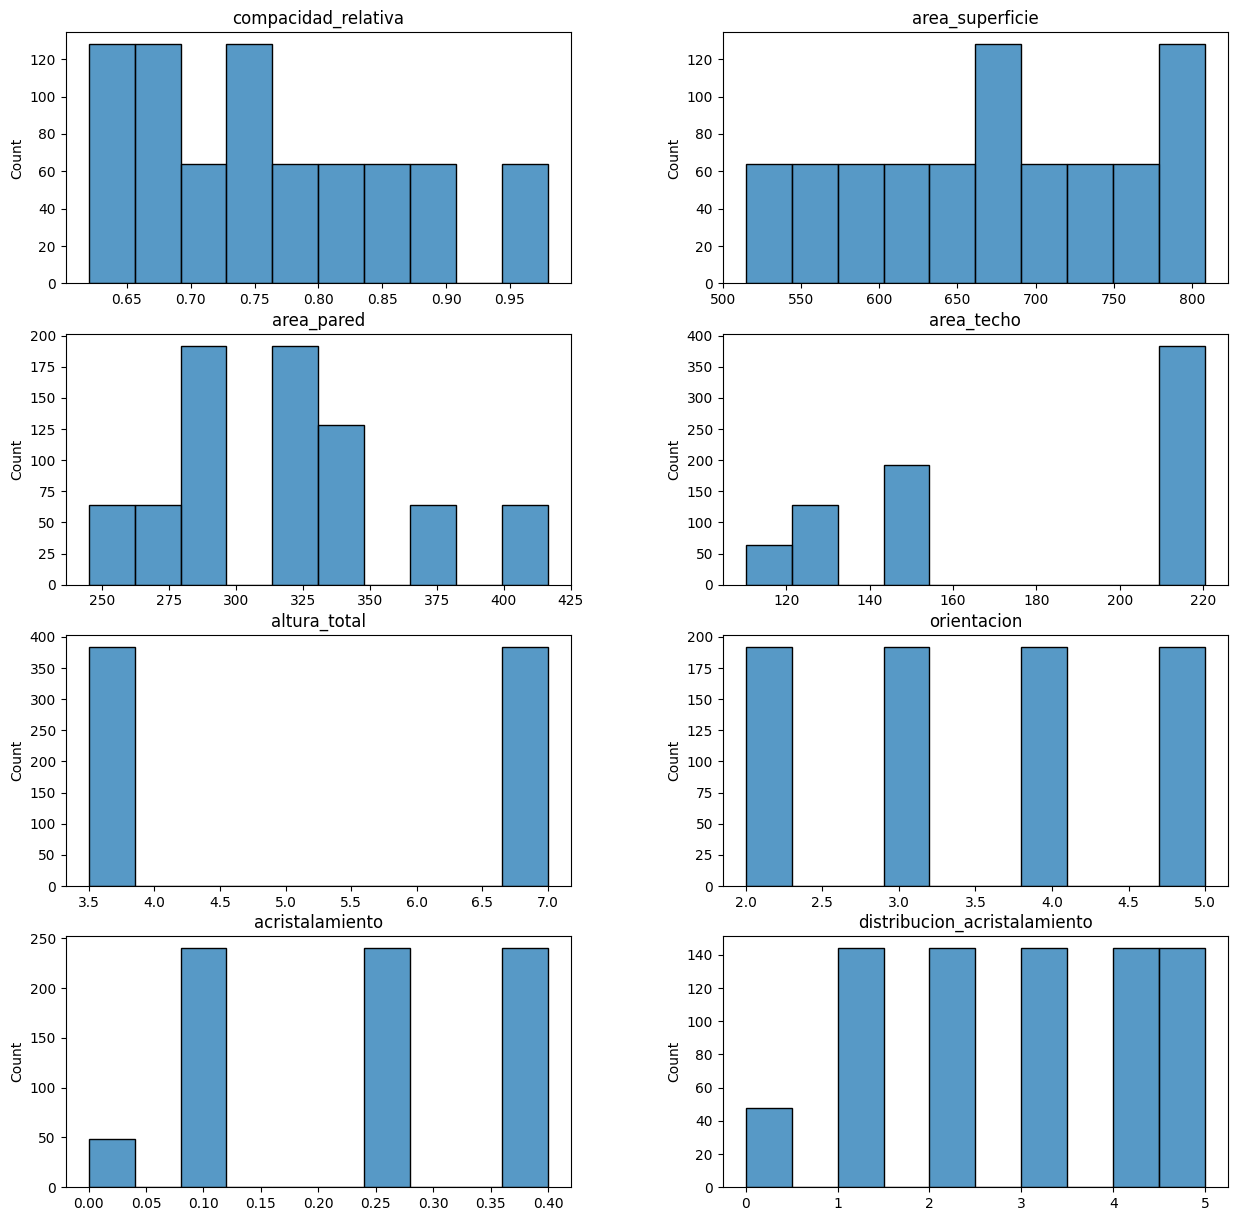

In [35]:
# Se dibujan histogramas combinando Matplotlib y Seaborn para ver la distribución de los valores para cada variable

fig, axes = plt.subplots(4,2, figsize=(15,15)) # ---> Matplotlib
plt.subplots_adjust(wspace=0.3)
axes = axes.ravel()
for col, ax in zip(df[num_cols], axes):
  sns.histplot(x=df[col], ax=ax, bins=10) # ---> Seaborn
  ax.set(title=f'{col}', xlabel=None) # ---> Matplotlib

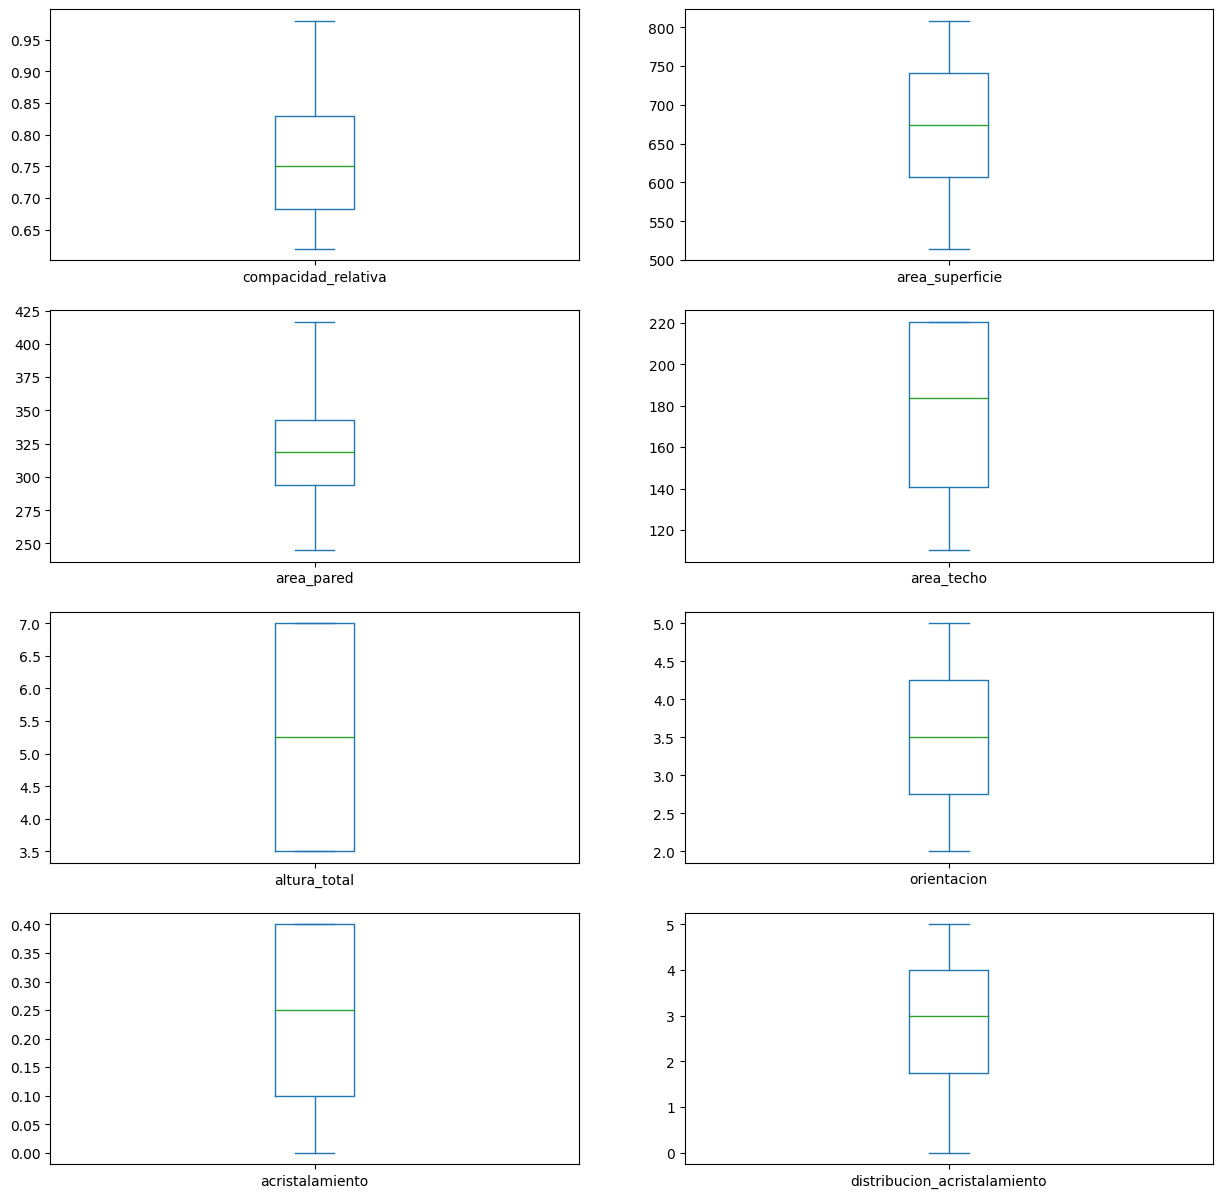

In [36]:
# Se grafica diagramas de caja para ver distribución de los datos

fig, axes = plt.subplots(4,2, figsize=(15,15))
axes = axes.ravel()
for col, ax in zip(df[num_cols], axes):
  df[col].plot(kind='box', ax=ax) # ---> Pandas

<Axes: xlabel='X7', ylabel='count'>

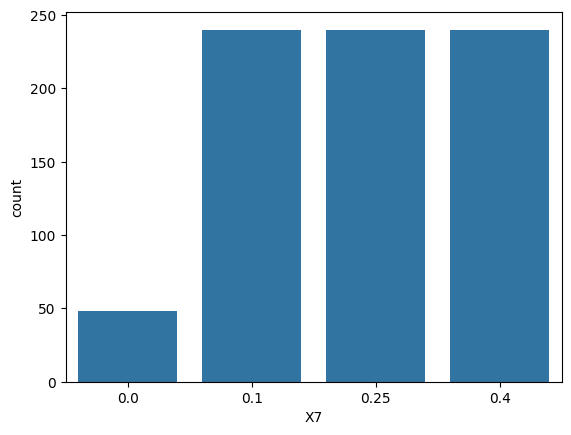

In [ ]:
## Gráfico de barras para la variable X7 para ver la frecuencia de cada categoría:
sns.countplot(x='X7', data=df)

In [40]:
def diagnostic_plots(df, variable):

    plt.figure(figsize=(15,6))

    plt.subplot(1, 2, 1)

    df[variable].hist(bins=30)

    plt.title(f"Histogram of {variable}")

    plt.subplot(1, 2, 2)

    stats.probplot(df[variable], dist="norm", plot=plt)

    plt.title(f"Q-Q plot of {variable}")

    plt.show()

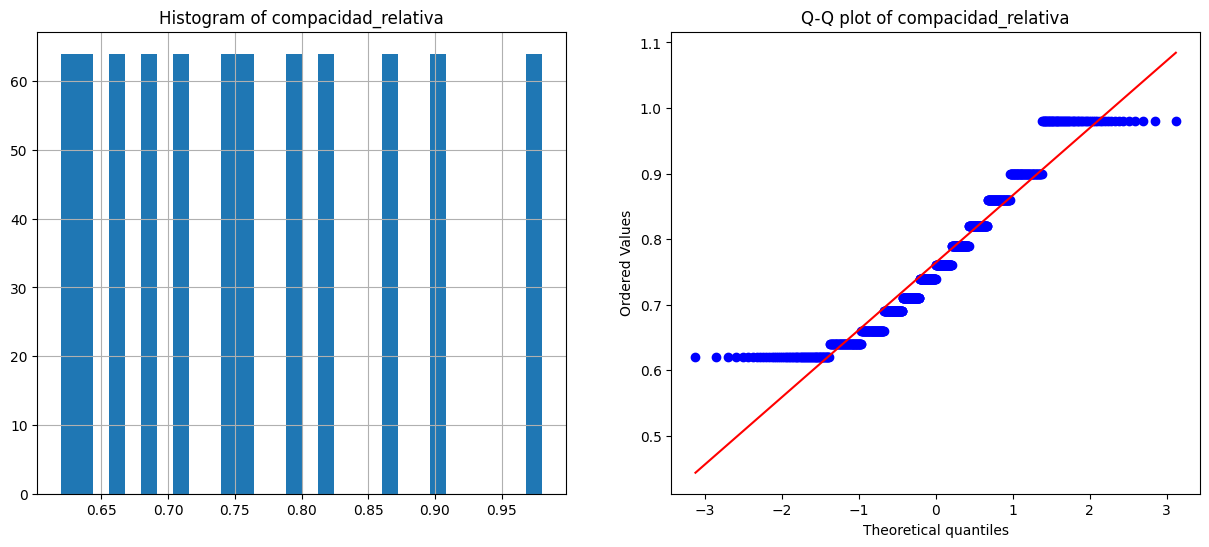

In [42]:
diagnostic_plots(df, "compacidad_relativa")

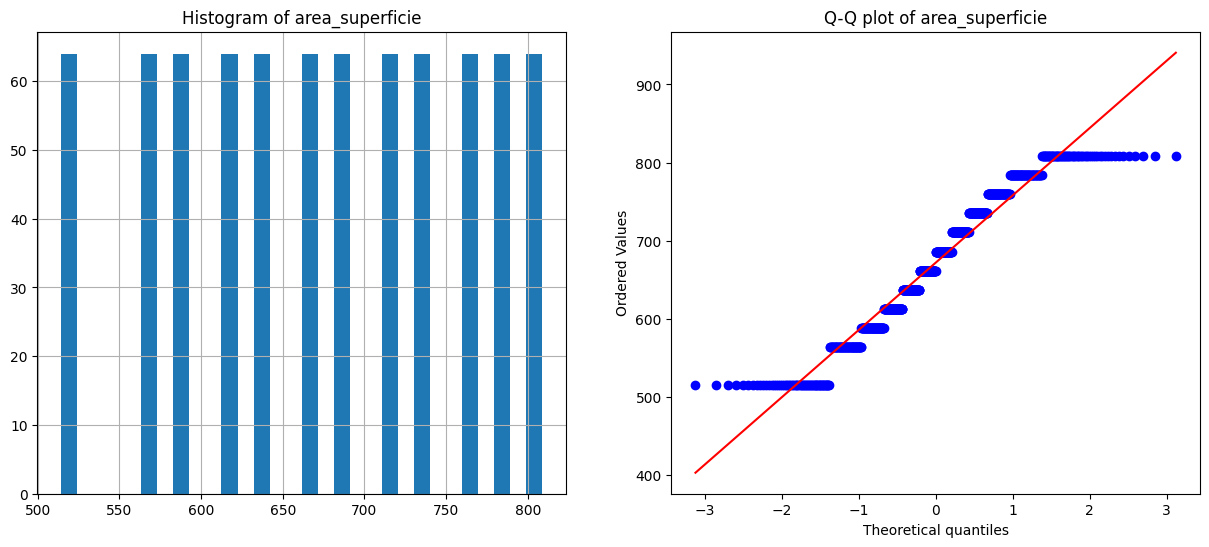

In [41]:
diagnostic_plots(df, "area_superficie")

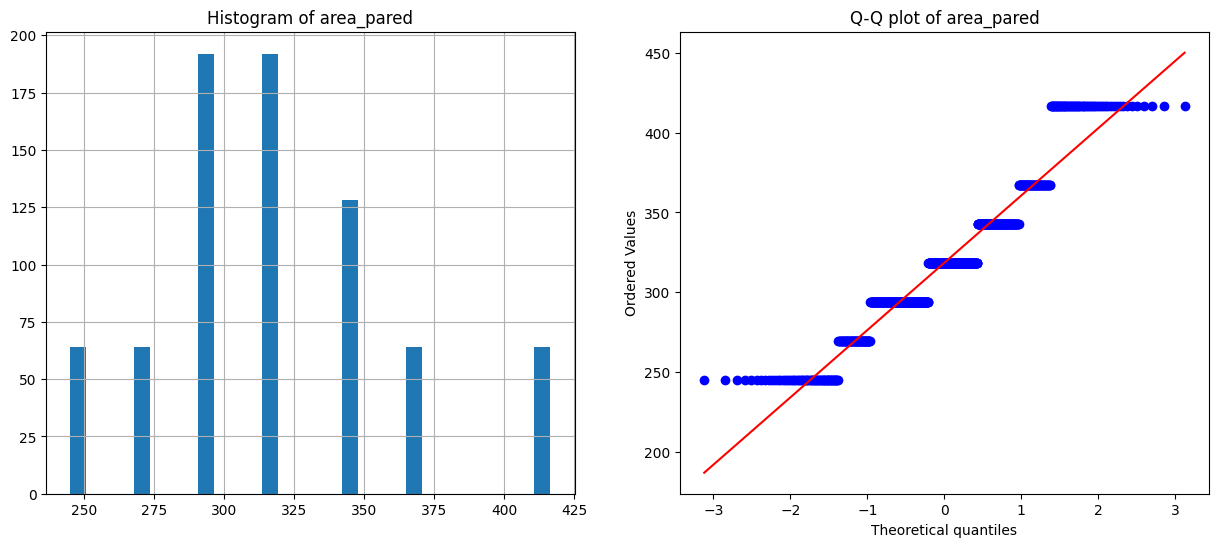

In [43]:
diagnostic_plots(df, "area_pared")

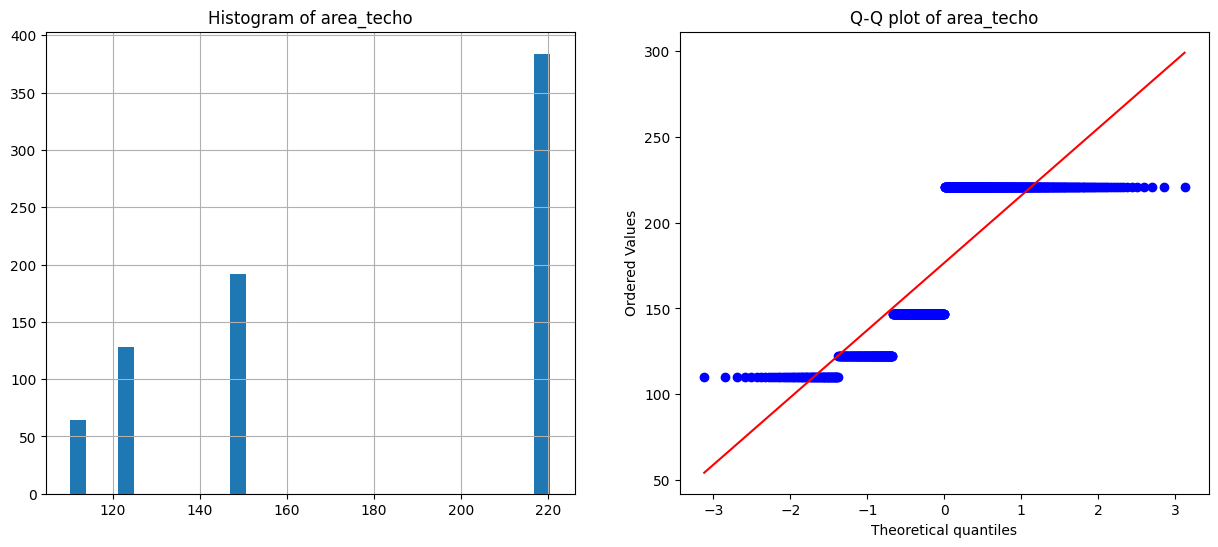

In [45]:
diagnostic_plots(df, "area_techo")

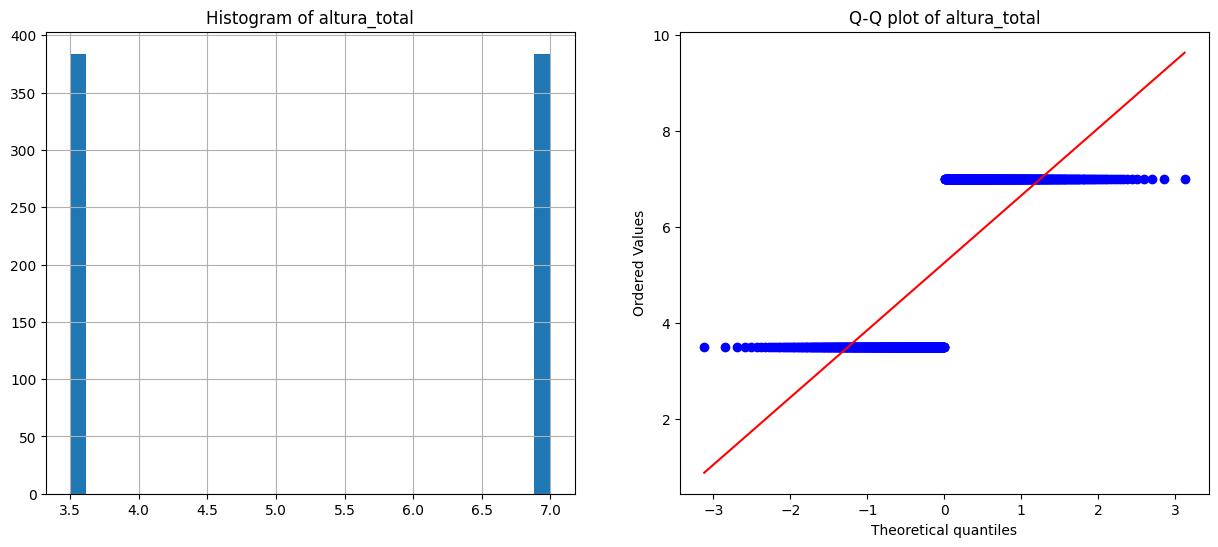

In [46]:
diagnostic_plots(df, "altura_total")

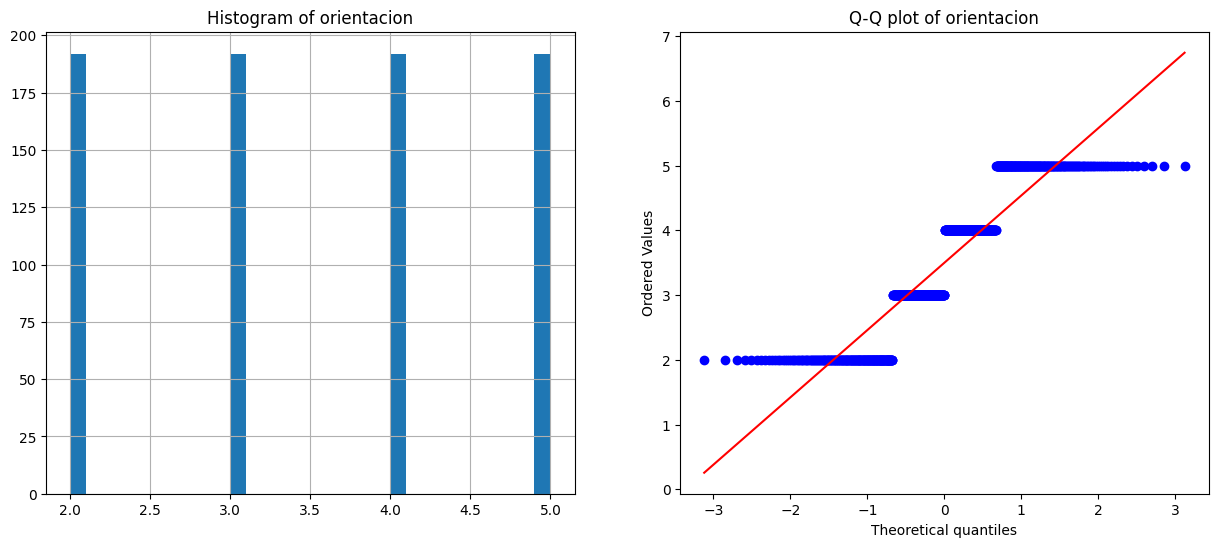

In [47]:
diagnostic_plots(df, "orientacion")

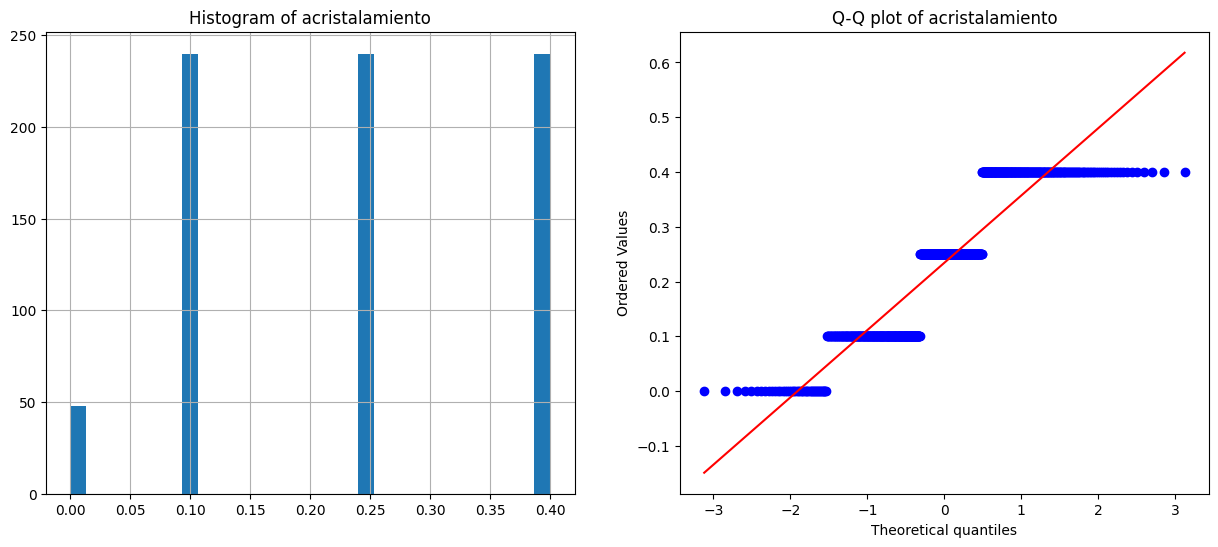

In [49]:
diagnostic_plots(df, "acristalamiento")

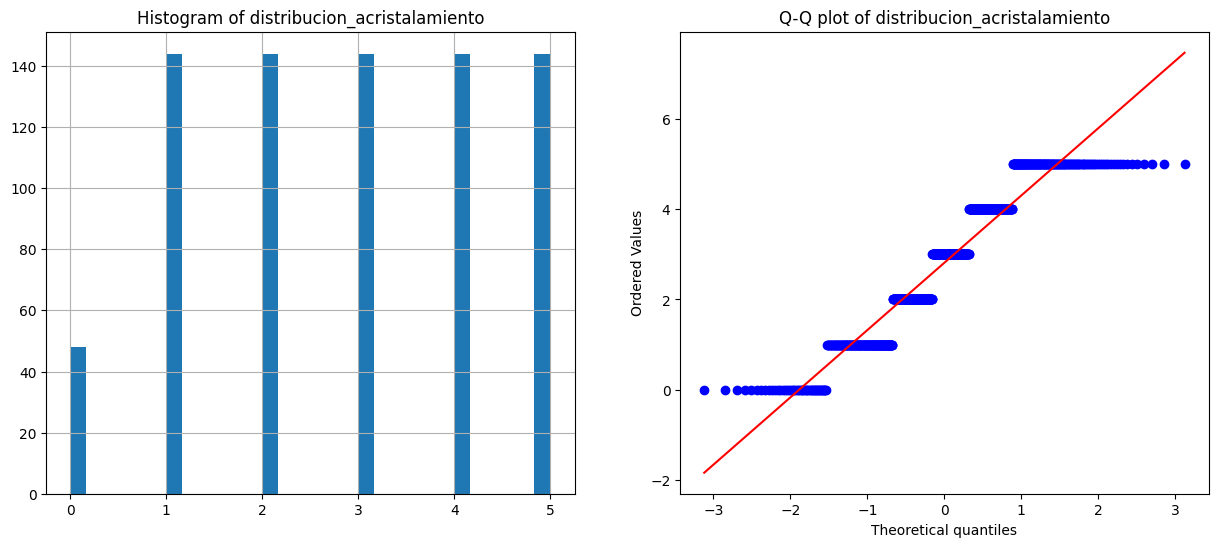

In [50]:
diagnostic_plots(df, "distribucion_acristalamiento")

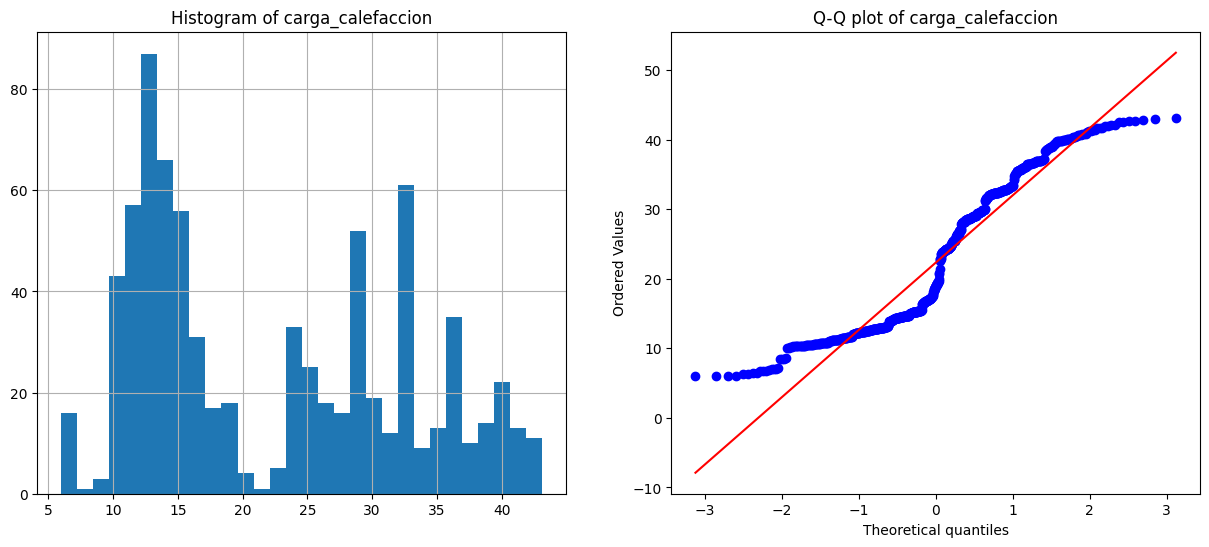

In [51]:
diagnostic_plots(df, "carga_calefaccion")

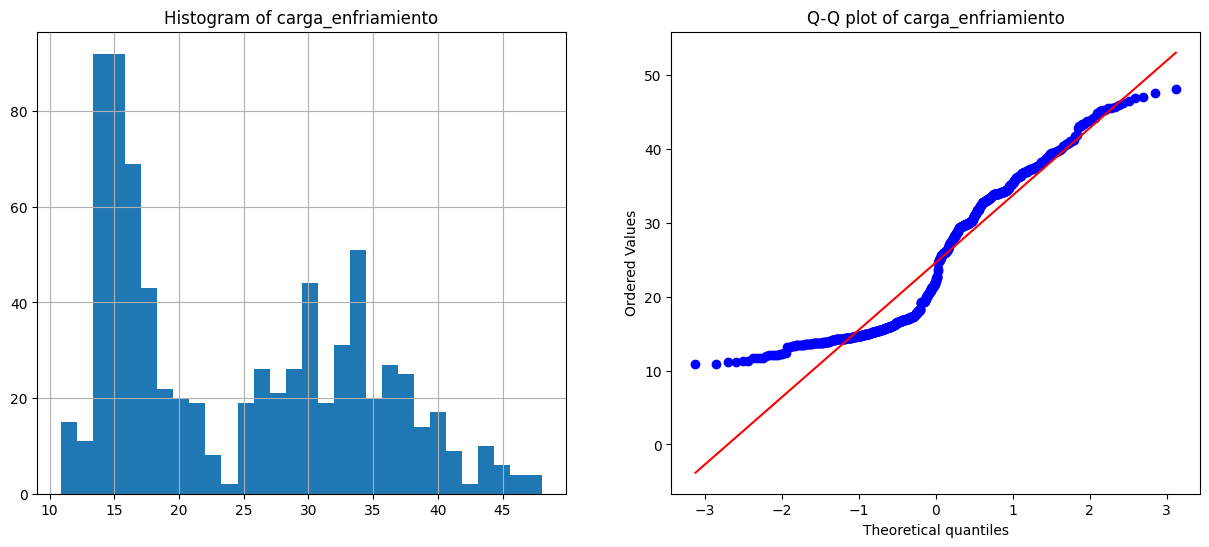

In [52]:
diagnostic_plots(df, "carga_enfriamiento")

<Axes: >

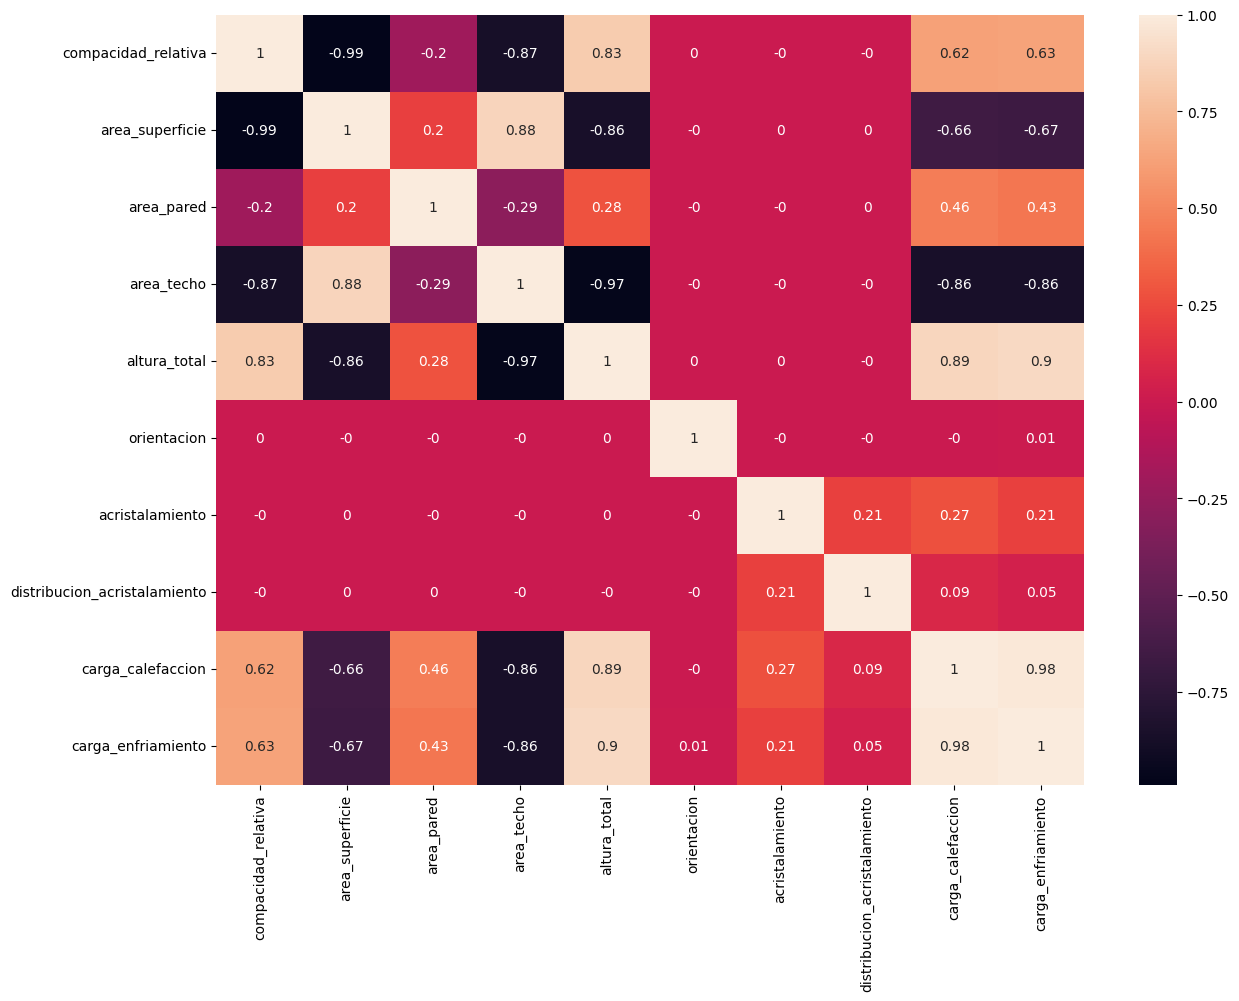

In [53]:
## Diagramamos mapa de calor para ver la correlación de las variables
plt.figure(figsize = (14, 10))
sns.heatmap(round(df.corr(numeric_only=True),2), annot = True) # ---> Seaborn

In [86]:
##Eliminamos variables con alta correlacionalidad
lista_w = df.filter(regex='carga_').columns
df = df.drop(lista_w, axis=1)

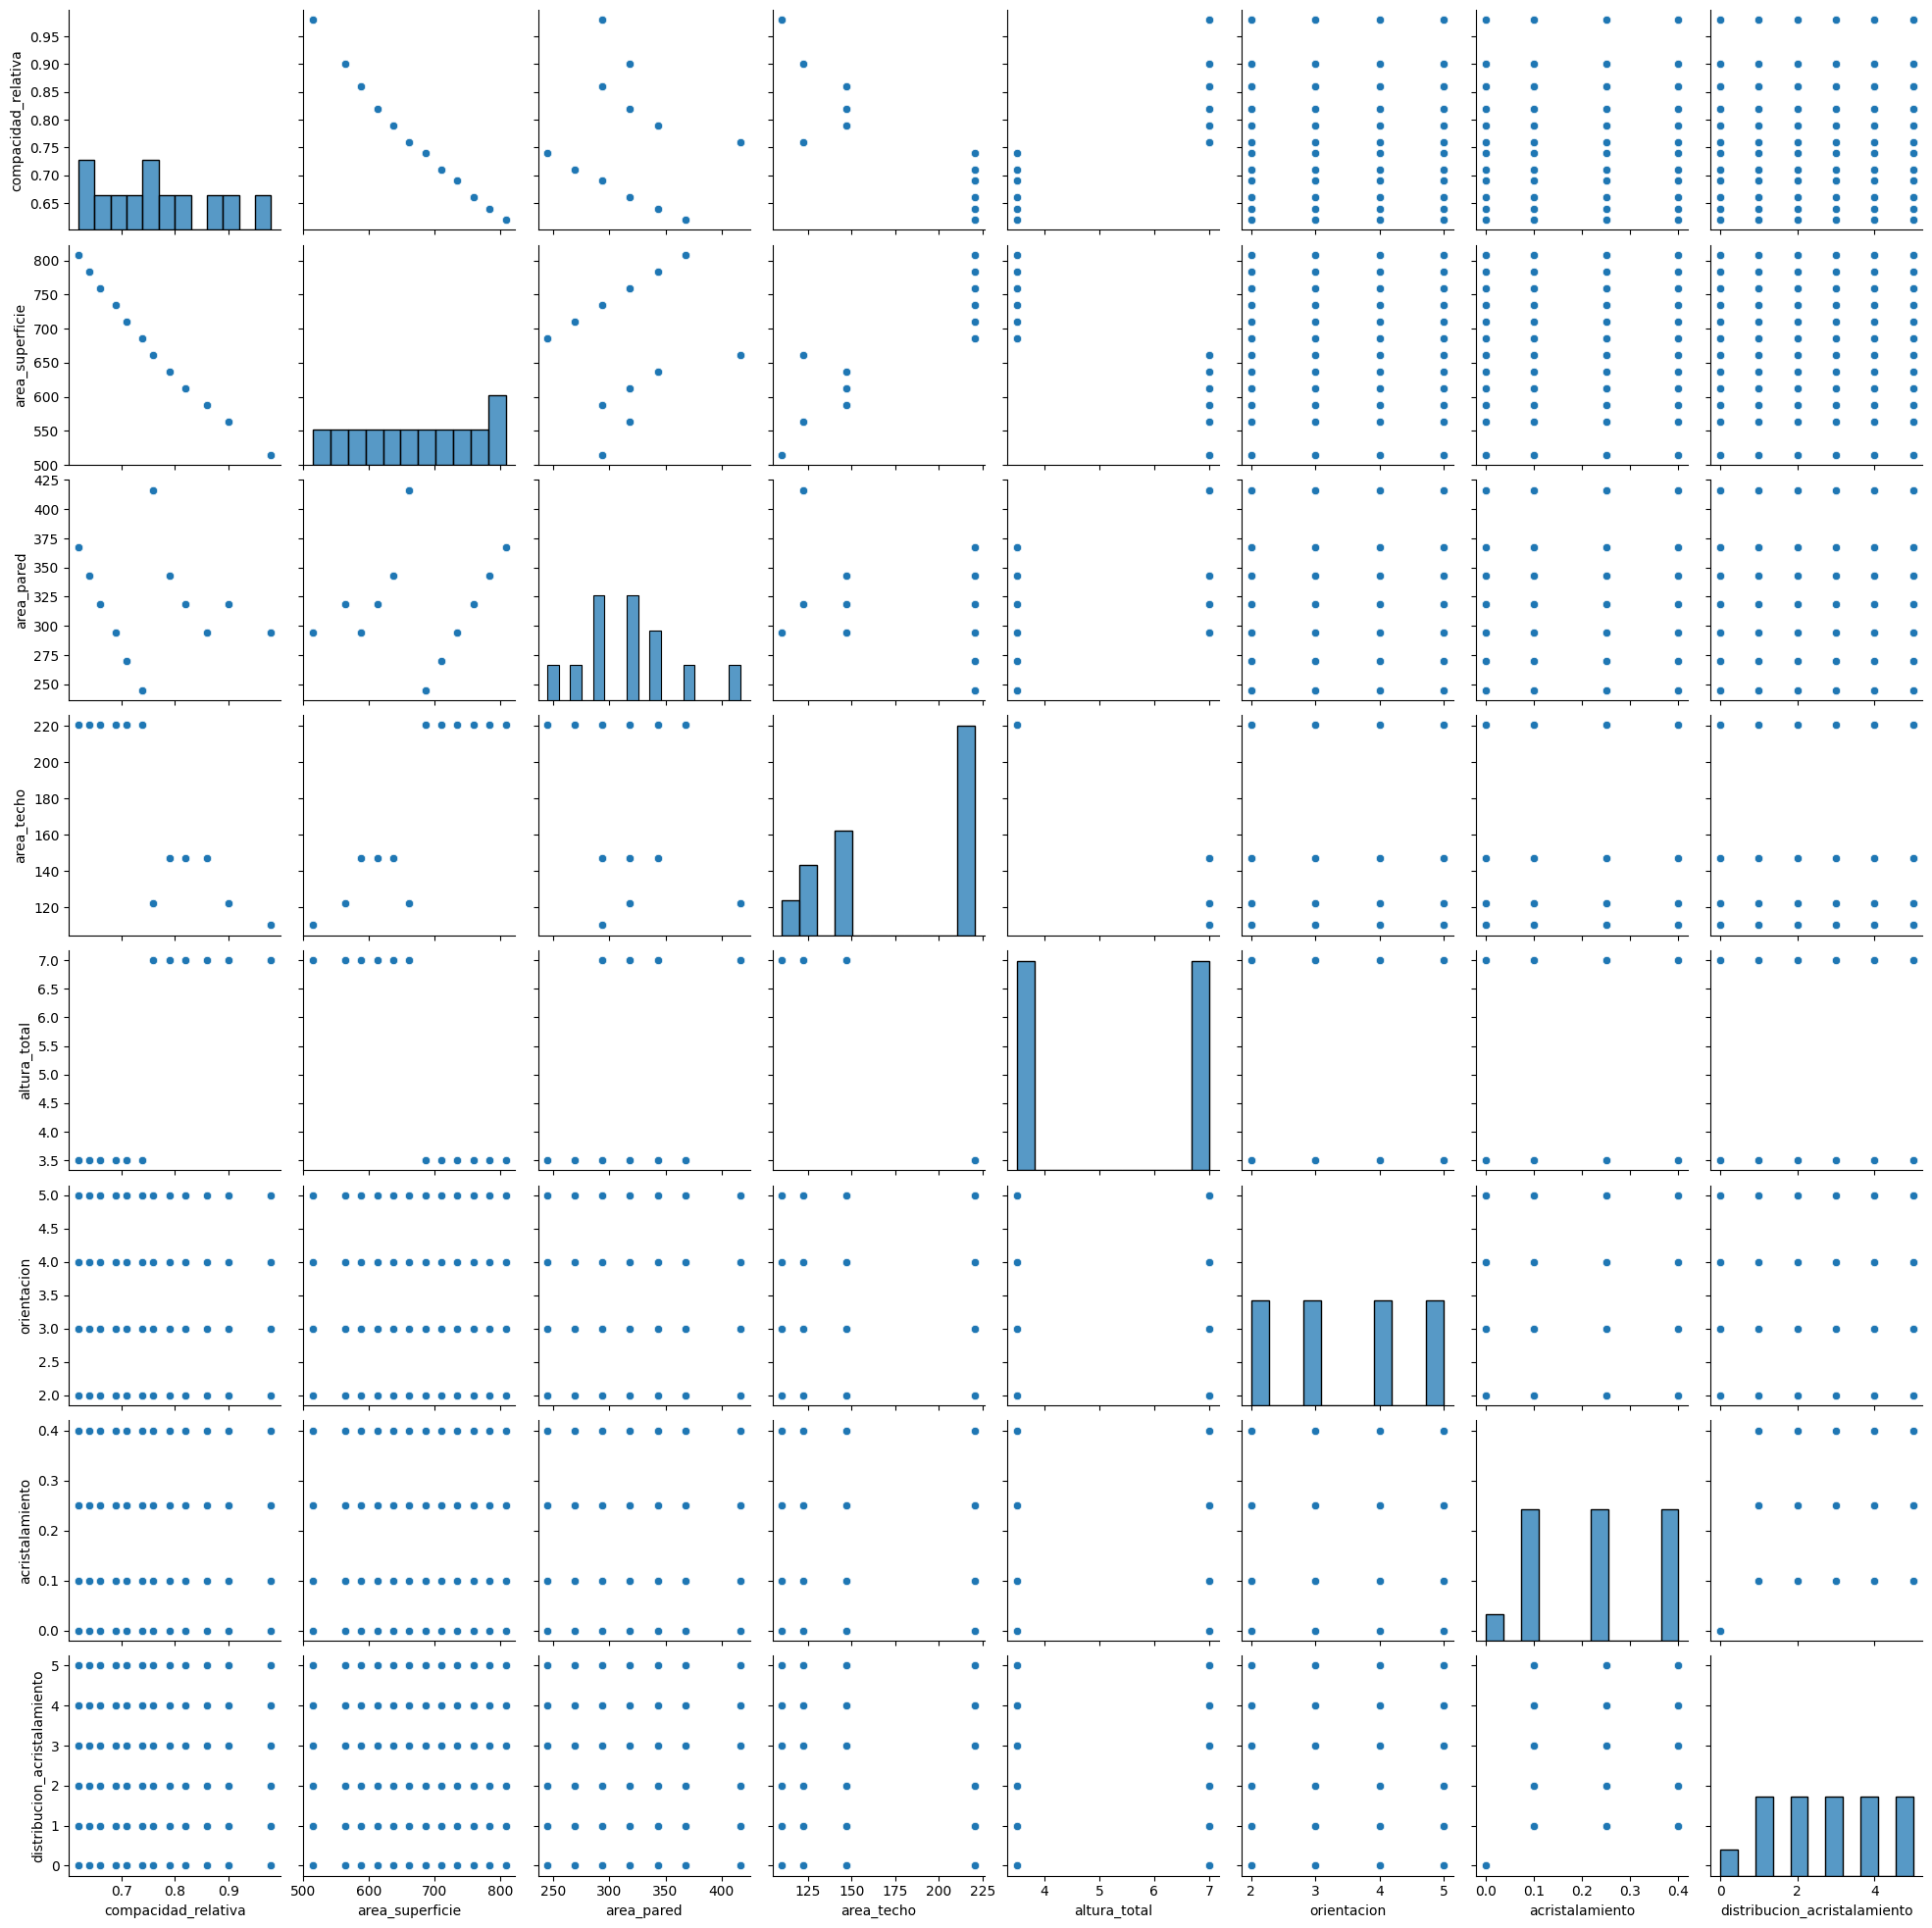

In [89]:
sns.pairplot(data=df[['compacidad_relativa',
        'area_superficie',
        'area_pared',
        'area_techo',
        'altura_total',
        'orientacion',
        'acristalamiento',
        'distribucion_acristalamiento']])

In [100]:
Xtrain, Xtv, ytrain, ytv = train_test_split(X, y, train_size=0.6, shuffle=True, random_state=5)
Xval, Xtest, yval, ytest = train_test_split(Xtv, ytv, test_size=0.5, shuffle=True, random_state=7)

In [104]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
# Apliaremos lo mínimo de transformaciones, en particular para datos perdidos:
# Como solo tenemos una numérica, la podemos dejar sin escalar:
num_pipe = Pipeline(steps = [('numImp', SimpleImputer(strategy='median')),
                             ])
num_pipe_nombres = [0]   # ['Page total likes']


# Las ordinales las identificamos como tales:
ord_pipe = Pipeline(steps =  [('OrdImp', SimpleImputer(strategy='most_frequent')),
                              ('Ordfun', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1 ))
                              ])
ord_pipe_nombres = [3,4,5]   # ['Post Month', 'Post Weekday', 'Post Hour']

# Las nominales las transformamos con One-Hot-Encoder:
nom_pipe = Pipeline(steps = [('ohe', OneHotEncoder(drop='first',
                                                   handle_unknown='ignore',
                                                   ))])
nom_pipe_nombres = [1,2,6]   # ['Type', 'Category', 'Paid']


# Conjuntamos las transformaciones que aplicaremos:
columnasTransformer = ColumnTransformer(transformers = [('numpow', num_pipe, num_pipe_nombres),
                                                        ('catOrd', ord_pipe, ord_pipe_nombres),
                                                        ('catNom', nom_pipe, nom_pipe_nombres)
                                                        ],
                                        remainder='passthrough')

# Ajustamos en Train y transformamos en Val y Test:
XtrainFit = columnasTransformer.fit(Xtrain)
XtrainT = XtrainFit.transform(Xtrain)
XvalT  =  XtrainFit.transform(Xval)
modelo_rf = RandomForestRegressor()

ValueError: all features must be in [0, 1] or [-2, 0]